In [1]:
import os
import numpy as np
import random


def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review

def read_data(file):
    '''
    Read each file into a list of strings.
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on',
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(str.maketrans("", "", symbols)).strip(), lines)
    words = filter(None, words)
    return list(words)


def load_and_shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    pos_path = r"C:\Users\17346\DSGA 1003\hw3\hw3\data\pos"
    neg_path = r"C:\Users\17346\DSGA 1003\hw3\hw3\data\neg"

    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)

    review = pos_review + neg_review
    random.shuffle(review)
    return review

# Taken from http://web.stanford.edu/class/cs221/ Assignment #2 Support Code
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum(d1.get(f, 0) * v for f, v in d2.items())

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale


#### Q6. Write a function that converts an example (a list of words) into a sparse bag-of-words representation. 
You may find Python’s Counter3 class to be useful here. Note that a Counter is itself a dictionary.

In [2]:
from collections import Counter

In [3]:
def bag_of_words(review):
    word_dict = []
    for x in review:
        word_dict.append(Counter(x))
    return word_dict

In [4]:
review = load_and_shuffle_data()

In [5]:
review_class = []
for i in range(len(review)):
    review_class.append(review[i][-1])
    del review[i][-1]
    
wordCounts = bag_of_words(review)

#### Q7. Load all the data and split it into 1500 training examples and 500 validation examples.
Format the training data as a list X train of dictionaries and y train as the list of corresponding 1 or -1 labels. Format the test set similarly.


In [6]:
train_X = wordCounts[:1500]
test_X =  wordCounts[1500:2000]
train_y = review_class[:1500]
test_y = review_class[1500:2000]

#### Q8. Implement the Pegasos algorithm to run on a sparse data representation. 
The output should be a sparse weight vector w represented as a dictionary. Note that our Pegasos algorithm starts at w = 0, which corresponds to an empty dictionary.

Note: With this problem, you will need to take some care to code things efficiently. In particular, be aware that making copies of the weight dictionary can slow down your code significantly. If you want to make a copy of your weights (e.g. for checking for convergence), make sure you don’t do this more than once per epoch. Also: If you normalize your data in some way, be sure not to destroy the sparsity of your data. Anything that starts as 0 should stay at 0.

In [7]:
import time

In [8]:
def pegasos(x, y, lambda_reg=1, iteration=100):
    start = time.time()
    w = {}
    t = 0
    num_instances = len(x)
    for i in range(iteration):        
        for j in range(num_instances):
            t += 1
            eta = 1 / (lambda_reg * t)
            increment(w, -eta*lambda_reg, w)
            if y[j] * dotProduct(w, x[j]) < 1:
                increment(w, eta*y[j], x[j])
        i += 1
        end = time.time()
    print('Total Time: {}'.format(end - start))
    return w

#### Q9. Implement the Pegasos algorithm with the (s, W) representation.

In [9]:
def pegasos2(x, y, lambda_reg=1, iteration=100):
    start = time.time()
    t = 1
    s = 1
    W = {}
    num_instances = len(x)
    for i in range(iteration):        
        for j in range(num_instances):
            t += 1
            eta = 1 / (lambda_reg * t)          
            s = (1 - eta * lambda_reg)*s
            if (y[j] * dotProduct(W, x[j])) < 1/s:
                increment(W, 1/s*eta*y[j], x[j])
        w = {}
        increment(w, s, W)
        i += 1
        end = time.time()
    print('Total Time: {}'.format(end - start))
    return w

In [10]:
pegasos(train_X, train_y, lambda_reg = 1, iteration = 5)

{'i': 0.011866666666666666,
 "didn't": -0.017066666666666595,
 'come': 0.002533333333333342,
 'into': -0.042666666666666755,
 'city': 0.021333333333333305,
 'of': 0.011599999999999965,
 'angels': 0.012933333333333281,
 'expecting': 0.004533333333333356,
 'greatness': 0.0017333333333333302,
 "i've": 0.019866666666666772,
 'never': 0.0018666666666666775,
 'seen': 0.03680000000000006,
 'wim': 0.000399999999999999,
 "wenders'": 0.000399999999999999,
 'wings': 0.005733333333333343,
 'desire': 0.0016000000000000053,
 'the': 0.00466666666666675,
 'classic': 0.007600000000000014,
 'movie': -0.03800000000000005,
 'upon': 0.0005333333333333357,
 'which': 0.005200000000000007,
 'is': 0.023200000000000096,
 'loosely': -0.0005333333333333336,
 'based': 0.0006666666666666685,
 'then': -0.02786666666666676,
 'again': 0.007599999999999995,
 'have': -0.059600000000000056,
 'enough': -0.01093333333333337,
 'stories': 0.0001333333333333286,
 'are': -0.009599999999999978,
 'a': 0.01453333333333329,
 'simi

In [11]:
pegasos2(train_X, train_y, lambda_reg = 1, iteration = 5)

Total Time: 2.000840663909912


{'i': 0.01013198240234633,
 "didn't": -0.01679776029862678,
 'come': 0.001066524463404879,
 'into': -0.043060925209971804,
 'city': 0.021863751499799917,
 'of': 0.012265031329156075,
 'angels': 0.013331555792560935,
 'expecting': 0.004266097853619499,
 'greatness': 0.0018664178109585304,
 "i've": 0.01986401813091579,
 'never': 0.0013331555792560823,
 'seen': 0.03759498733502184,
 'wim': 0.0003999466737768281,
 "wenders'": 0.0003999466737768281,
 'wings': 0.006132515664578029,
 'desire': 0.0014664711371817011,
 'the': 0.005199306759098707,
 'classic': 0.0067990934542060824,
 'movie': -0.03799493400879863,
 'upon': 0.0006665777896280514,
 'which': 0.009065457938941443,
 'is': 0.025063324890014605,
 'loosely': -0.0005332622317024384,
 'based': 0.00039994667377682815,
 'then': -0.027862951606452368,
 'again': 0.007598986801759737,
 'have': -0.05825889881349135,
 'enough': -0.010265297960271917,
 'stories': 2.930598038605258e-18,
 'are': -0.013064924676709704,
 'a': 0.015731235835221978,
 '

#### Q11. Write a function classification error that takes a sparse weight vector w, a list of sparse vectors X and the corresponding list of labels y, and returns the fraction of errors when predicting yi using sign(wT xi). In other words, the function reports the 0-1 loss of the linear predictor f(x) = wT x.

In [16]:
def classification_error(x, y, w):
    num_instances = len(x)
    loss = 0
    for i in range(num_instances):
        prediction = dotProduct(w, x[i])
        if(prediction * y[i] < 0):
            loss += 1
    loss = loss / num_instances
    return loss

In [17]:
w = pegasos2(train_X, train_y, lambda_reg = 1, iteration = 10)
loss = classification_error(train_X, train_y, w)
print(loss)

Total Time: 4.655479907989502
0.12333333333333334


#### Q12. Search for the regularization parameter that gives the minimal percent error on your test set. 

You should now use your faster Pegasos implementation, and run it to convergence. A good search strategy is to start with a set of regularization parameters spanning a broad range of orders of magnitude. Then, continue to zoom in until you’re convinced that additional search will not significantly improve your test performance. Plot the test errors you obtained as a function of the parameters λ you tested. (Hint: the error you get with the best regularization should be closer to 15% than 20%. If not, maybe you did not train to convergence.)

Total Time: 3.228717803955078
Total Time: 3.071549415588379
Total Time: 3.29384708404541
Total Time: 3.2746684551239014
Total Time: 3.2624363899230957
Total Time: 3.1394731998443604
Total Time: 3.425117254257202
Total Time: 3.900139331817627
Total Time: 4.01365852355957
Total Time: 4.8298585414886475


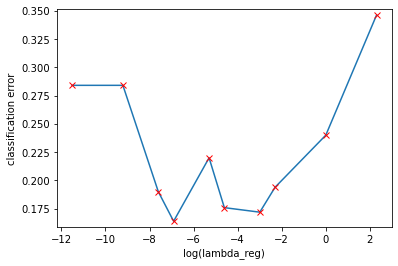

lambda_regs: [1e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10]
losses: [0.284, 0.284, 0.19, 0.164, 0.22, 0.176, 0.172, 0.194, 0.24, 0.346]
lambda that minimizes classification error is  0.001


In [19]:
import matplotlib.pyplot as plt

lambdas_regs = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10]

w_list = []
for lambda_reg in lambdas_regs:
    w_list.append(pegasos2(train_X, train_y, lambda_reg = lambda_reg, iteration = 10))
    
losses = []
for w in w_list:
    loss = classification_error(test_X, test_y, w)
    losses.append(loss)

plt.plot(np.log(lambdas_regs),losses)
plt.plot(np.log(lambdas_regs),losses, 'rx')
plt.xlabel('log(lambda_reg)')
plt.ylabel('classification error')
plt.ylim(min(losses)-0.005, max(losses)+0.005)
plt.show()

print('lambda_regs:', lambdas_regs)
print('losses:', losses)
print('lambda that minimizes classification error is ', lambdas_regs[np.argmin(losses)])

Total Time: 5.9236977100372314
Total Time: 5.642287969589233
Total Time: 5.76233172416687
Total Time: 5.667023658752441
Total Time: 5.761542081832886
Total Time: 6.054006814956665


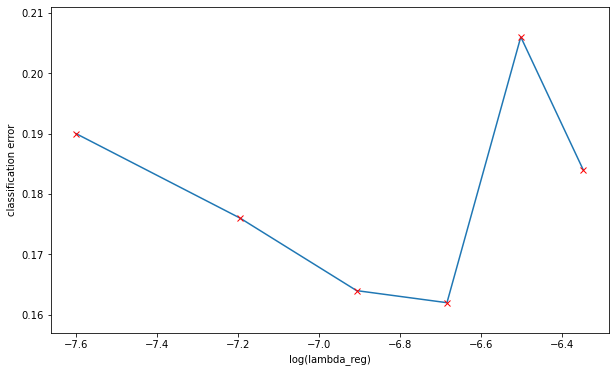

lambda_regs: [0.0005  0.00075 0.001   0.00125 0.0015  0.00175]
losses: [0.19, 0.176, 0.164, 0.162, 0.206, 0.184]
lambda that minimizes classification error is  0.00125


In [26]:
lambdas_regs = np.arange(0.0005, 0.002, 0.00025)
w_list = []
for lambda_reg in lambdas_regs:
    w_list.append(pegasos2(train_X, train_y, lambda_reg = lambda_reg, iteration = 10))
    
losses = []
for w in w_list:
    loss = classification_error(test_X, test_y, w)
    losses.append(loss)
    
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.log(lambdas_regs),losses)
plt.plot(np.log(lambdas_regs),losses, 'rx')
plt.xlabel('log(lambda_reg)')
plt.ylabel('classification error')
plt.ylim(min(losses)-0.005, max(losses)+0.005)
plt.show()
print('lambda_regs:', lambdas_regs)
print('losses:', losses)
print('lambda that minimizes classification error is ', lambdas_regs[np.argmin(losses)])